下載排名:
1. WhatsApp - 6000000000 downloads
2. YouTube - 5000000000 downloads
3. Facebook - 3000000000 downloads
4. Instagram - 1000000000 downloads
5. Snapchat - 1000000000 downloads
6. TikTok - 500000000 downloads

分數排名:
1. YouTube - Rating: 4.8
2. WhatsApp - Rating: 4.7
3. Instagram - Rating: 4.6
4. TikTok - Rating: 4.5
5. Snapchat - Rating: 4.3
6. Facebook - Rating: 4.0

整體排名最高的應用程式: WhatsApp


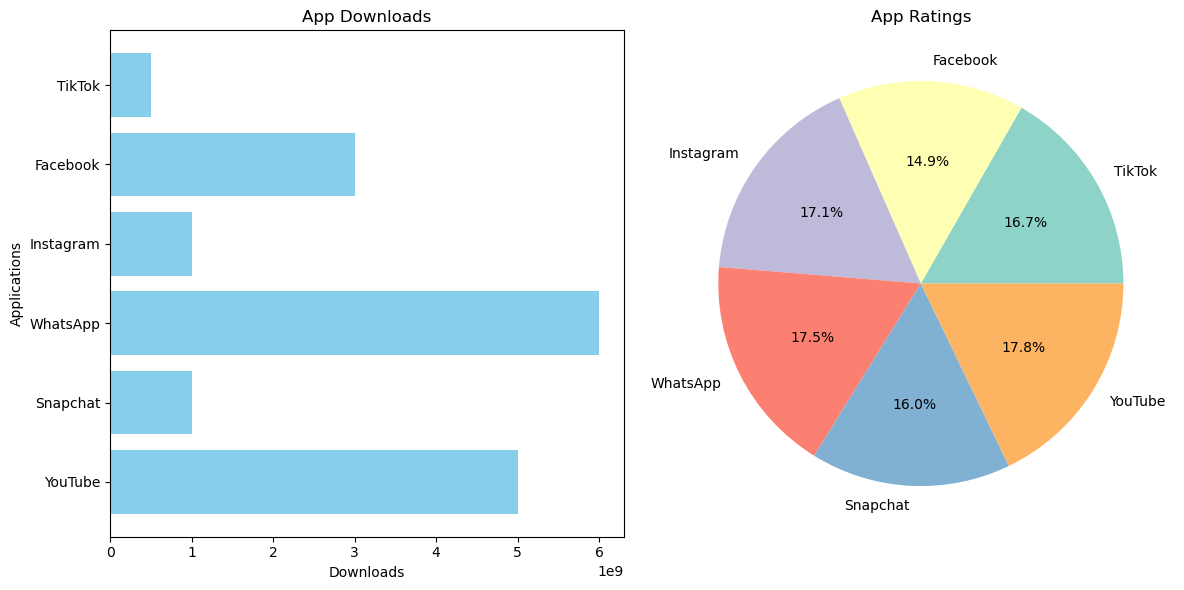

In [9]:
import json
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

def load_from_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)

def print_app_rankings(app_rankings):
    """
    輸出應用程式的下載排名和分數排名
    """
    sorted_by_downloads = sorted(app_rankings['apps'], key=lambda x: x['downloads'], reverse=True)
    print("下載排名:")
    for i, app in enumerate(sorted_by_downloads, start=1):
        print(f"{i}. {app['name']} - {app['downloads']} downloads")
        
    sorted_by_rating = sorted(app_rankings['apps'], key=lambda x: x['rating'], reverse=True)
    print("\n分數排名:")
    for i, app in enumerate(sorted_by_rating, start=1):
        print(f"{i}. {app['name']} - Rating: {app['rating']}")

def print_top_app(app_rankings):
    """
    輸出綜合下載次數與分數排名相對最高的應用程式
    """
    sorted_by_combined_rank = sorted(app_rankings['apps'], key=lambda x: (x['downloads'] + x['rating']), reverse=True)
    top_app = sorted_by_combined_rank[0]
    print(f"\n整體排名最高的應用程式: {top_app['name']}")

def plot_download_bar_chart(app_rankings):
    """
    繪製每個應用程式的下載量和評分長條圖
    """
    apps = [app['name'] for app in app_rankings['apps']]
    downloads = [app['downloads'] for app in app_rankings['apps']]
    ratings = [app['rating'] for app in app_rankings['apps']]  # 新增
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.barh(apps, downloads, color='skyblue')
    plt.xlabel('Downloads')
    plt.ylabel('Applications')
    plt.title('App Downloads')
    plt.gca().invert_yaxis()  # 反轉y軸，讓第一個應用程式在頂部
    
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    # 將評分作為圓餅圖
    plt.pie(ratings, labels=apps, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
    plt.title('App Ratings')
    
    # 設置中文字型
    font = FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc') # 替換成你系統上的中文字型路徑
    plt.xticks(fontproperties=font, fontsize=10)
    plt.yticks(fontproperties=font, fontsize=10)
    
    plt.tight_layout()  # 調整子圖間距
    plt.show()

# 讀取 JSON 檔案
app_rankings_data = load_from_json("app_rankings.json")

# 輸出應用程式排名
print_app_rankings(app_rankings_data)

# 輸出綜合下載次數與分數排名相對最高的應用程式
print_top_app(app_rankings_data)

# 繪製下載量和評分長條圖
plot_download_bar_chart(app_rankings_data)
